In [1]:
import pandas as pd
# Load dataset
disney_pplus_titles = pd.read_csv('disney_plus_titles.csv')

In [2]:
disney_pplus_titles .head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [3]:
disney_pplus_titles .tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [4]:
disney_pplus_titles .isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
# Print column names to verify
print(disney_pplus_titles.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [7]:
# Example mapping dictionary for converting ratings to numerical values
rating_mapping = {
    'G': 1, 'TV-Y': 1, 'TV-G': 1,
    'PG': 2, 'TV-Y7': 2, 'TV-Y7-FV': 2, 'TV-PG': 2,
    'PG-13': 3, 'TV-14': 3
}


In [8]:
# Convert ratings to numerical values
disney_pplus_titles['rating'] = disney_pplus_titles['rating'].map(rating_mapping)

In [9]:
# Handle missing values in rating column
disney_pplus_titles['rating'].fillna(disney_pplus_titles['rating'].mean(), inplace=True)

In [10]:
# Ensure 'release_year' is a column name
release_year_column = 'release_year'  # Ensure this matches the actual column name

In [11]:
# Preprocessing release_year
disney_pplus_titles[release_year_column] = pd.to_datetime(disney_pplus_titles[release_year_column], format='%Y')

C:\Users\Rangaswami\AppData\Local\Temp\ipykernel_10444\2655009874.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.set_index(date_column).resample('Y').mean()


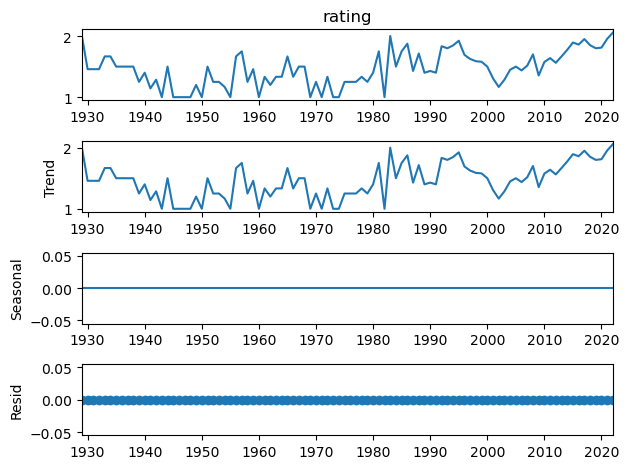

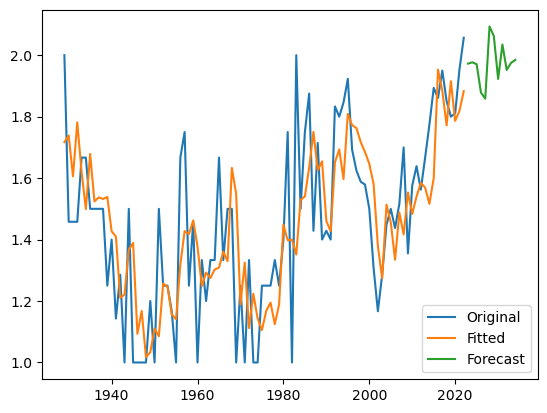

In [14]:
# Time Series Analysis
def time_series_analysis(df, date_column):
    df = df.set_index(date_column).resample('Y').mean()
    df['rating'].fillna(df['rating'].mean(), inplace=True)
    
    decomposition = seasonal_decompose(df['rating'], model='additive')
    decomposition.plot()
    plt.show()

    model = ExponentialSmoothing(df['rating'], trend='add', seasonal='add', seasonal_periods=12)
    fit = model.fit()
    forecast = fit.forecast(12)
    
    plt.plot(df['rating'], label='Original')
    plt.plot(fit.fittedvalues, label='Fitted')
    plt.plot(forecast, label='Forecast')
    plt.legend()
    plt.show()

time_series_analysis(disney_pplus_titles, release_year_column)

In [15]:
# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

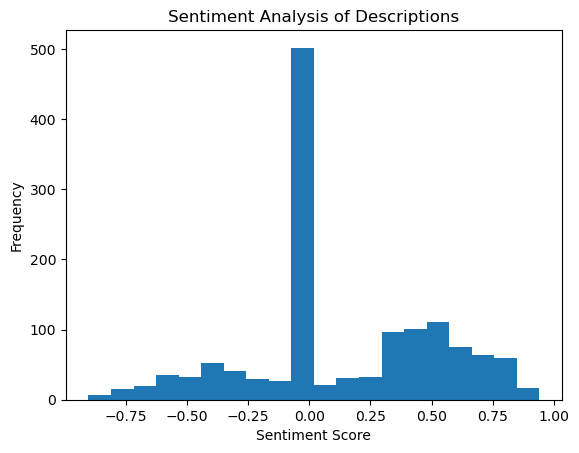

In [16]:
# Sentiment Analysis
def sentiment_analysis(df):
    sia = SentimentIntensityAnalyzer()
    
    df['sentiment'] = df['description'].apply(lambda x: sia.polarity_scores(x)['compound'])
    
    plt.hist(df['sentiment'], bins=20)
    plt.title('Sentiment Analysis of Descriptions')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

sentiment_analysis(disney_pplus_titles)

D:\python\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


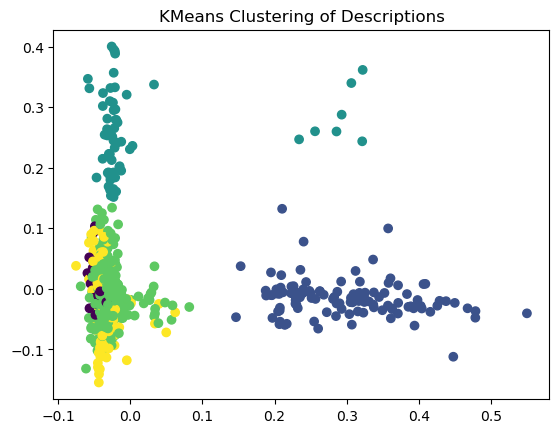

In [17]:
# Clustering/Classification
def clustering_classification(df):
    tfidf = TfidfVectorizer(stop_words='english')
    X = tfidf.fit_transform(df['description'].fillna(''))
    
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X.toarray())
    
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
    plt.title('KMeans Clustering of Descriptions')
    plt.show()

clustering_classification(disney_pplus_titles)